# Рынок заведений общественного питания Москвы

В Москве планирует открыться небольшое кафе. Главная его особенность  — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Возможных инвесторов интересует текущее положение дел на рынке — получится ли снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Необходимо подготовить исследование рынка. Для этого у нас есть открытые данные о заведениях общественного питания в Москве


**Цель исследования:** дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения для успешного открытия нового кафе в Москве

**Этапы исследования:**
- подготовить данные к анализу
- исследовать соотношение видов объектов общественного питания по количеству
- исследовать соотношение сетевых и несетевых заведений по количеству. Определить, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест
- определить какой вид объекта предоставляет в среднем самое большое количество посадочных мест
- построить график топ-10 улиц по количеству объектов общественного питания. Определить в каких районах Москвы находятся эти улицы
- определить число улиц с одним объектом общественного питания, а также каких районах Москвы находятся эти улицы
- сделать выводы и предоставить рекомендации инвесторам

Снабдить исследование графиками

## Изучение данных и подготовка к анализу

### Загрузка данных

Нам предоставлена таблица rest_data с информацией о заведения общественного питания в Москве. 

Согласно полученной документации в таблице имеются следующие столбцы:
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

Импортируем необходимые библиотеки и откроем таблицу

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import plotly.io as pio
pio.renderers.default = "png"

import textwrap as tw
import re

In [2]:
try:
    rest = pd.read_csv('rest_data.csv')
except:
    rest = pd.read_csv('/Users/ASUS/Учебные проекты/8_Как рассказать/rest_data.csv')

In [3]:
def data_info(data):
    data.columns = data.columns.str.lower()
    display(data.head())
    print('*' * 90)
    data.info()
    print('*' * 90)
    print(f' Количество явных дубликатов - {data.duplicated().sum()}')
    print('*' * 90)
    print(f' Количество пропусков - {data.isna().sum()}');

In [4]:
data_info(rest)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


******************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
******************************************************************************************
 Количество явных дубликатов - 0
******************************************************************************************
 Количество пропусков - id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64


In [5]:
pd.set_option('max_colwidth', None)

### Первичный анализ данных и поиск аномалий

Обзор данных показал, что явные дубликаты отсутствуют. Проверим имеются ли неявные. Для этого посмотрим уникальные значения в столбцах и их количество.

In [6]:
rest[['object_name', 'object_type', 'address']].agg('nunique')

object_name    10393
object_type        9
address         9108
dtype: int64

In [7]:
display(rest['object_name'].unique(), rest['object_type'].unique(), rest['address'].unique())

array(['СМЕТАНА', 'Родник', 'Кафе «Академия»', ..., 'Бар Мята Lounge',
       'Мята Lounge Октябрьская', 'Кальянная «Мята Lounge»'], dtype=object)

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

array(['город Москва, улица Егора Абакумова, дом 9',
       'город Москва, улица Талалихина, дом 2/1, корпус 1',
       'город Москва, Абельмановская улица, дом 6', ...,
       'город Москва, Салтыковская улица, дом 7Г',
       'город Москва, Осенний бульвар, дом 9',
       'город Москва, улица Новый Арбат, дом 13'], dtype=object)

Видим, что в датасете представлены 9 тыс. различных адресов, 10 тыс. уникальных названий заведений и 9 категорий объектов. Т.к. данные значения отличаются от общего количества элементов таблицы, значит в каждом столбце с адресом и названием есть повторы.

Посмотрим на адреса

In [8]:
rest.pivot_table(index='address',values='id', aggfunc='count').query('id > 2')

,id
address,
"Николоямская улица, дом 28/60, строение 1",3
"город Москва, 1-й Красногвардейский проезд, дом 15",4
"город Москва, 1-й Красногвардейский проезд, дом 21, строение 2",9
"город Москва, 1-й Нагатинский проезд, дом 11, корпус 2",3
"город Москва, 1-й Тверской-Ямской переулок, дом 18",3
...,...
"город Москва, улица Щепкина, дом 47, строение 1",3
"город Москва, шоссе Энтузиастов, дом 12, корпус 2",12
"город Москва, шоссе Энтузиастов, дом 20",3


По одному адресу может находится несколько заведений. Например, в многоэтажном здании или торговом центре. Проверим один из адресов.

In [9]:
rest.query('address == "Николоямская улица, дом 28/60, строение 1"')

,id,object_name,chain,object_type,address,number
8759,21845,Шоколадница,да,кафе,"Николоямская улица, дом 28/60, строение 1",56
8760,25859,ДжонДжоли,нет,ресторан,"Николоямская улица, дом 28/60, строение 1",90
10505,179007,Караоке Song Vape BAR STEAK HOUSE,нет,ресторан,"Николоямская улица, дом 28/60, строение 1",40


Эти заведения действительно расположены по одному адресу, значит это не дубликаты. Идем дальше

Теперь изучим повторы в столбце с названиями. Посмотрим сколько несетевых заведений имеется в дубликатах (в сетевых одно название очень даже логично)

In [10]:
rest[rest['object_name'].duplicated()]['chain'].value_counts()

нет    2714
да     2259
Name: chain, dtype: int64

2714 названий. Посмотрим ближе, что это за заведения

In [11]:
rest[rest['object_name'].duplicated()].query('chain == "нет"')

,id,object_name,chain,object_type,address,number
114,28613,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,закусочная,"город Москва, Бригадирский переулок, дом 3-5",216
115,28614,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
195,149531,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0
238,27703,Кафе,нет,столовая,"город Москва, улица Бориса Галушкина, дом 26",45
341,20918,ГП КП МГАИ,нет,буфет,"город Москва, Дубосековская улица, дом 9",40
...,...,...,...,...,...,...
15014,210231,Кафе,нет,кафе,"город Москва, Люблинская улица, владение 60, строение 1/1",20
15015,208239,ГАЗПРОМНЕФТЬ,нет,кафе,"поселение ""Мосрентген"", деревня Дудкино, владение 1",20
15017,205588,Кофейня,нет,кафетерий,"город Москва, поселение Щаповское, улица Евгения Родионова, владение 1",16
15020,208941,Кальянс,нет,бар,"город Москва, поселение Сосенское, бульвар Веласкеса, дом 5, корпус 3",15


Видим, что попадаются названия "Кафе" и "Шаурма". Возможно, это множество небольших забегаловок без конкретного названия

In [12]:
rest[rest['object_name'].duplicated()].query('chain == "нет"')['object_name'].value_counts().head(20)

Столовая                                266
Кафе                                    235
Шаурма                                  233
Пекарня                                  75
Буфет                                    58
СТОЛОВАЯ                                 51
Школьно-базовая столовая                 43
КАФЕ                                     40
Выпечка                                  35
Кафетерий                                34
Кофейня                                  28
Донер Кебаб                              26
Бистро                                   22
БУФЕТ                                    22
Донер                                    19
Пиццерия                                 18
Кулинария                                16
ШАУРМА                                   15
КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА     15
Кофе                                     14
Name: object_name, dtype: int64

По первым 20 значениям видим, что повторы обусловлены тем, что это заведения без названий либо с категорией заведения вместо названия. Комбинат питания МГТУ и столовую сложно отнести к сетевым заведениям, но они являются муниципальными образованиями, соответсвенно наличие таких дубликатов объяснимо и логично.

Посмотрим распределение значений в стоблце `number` 

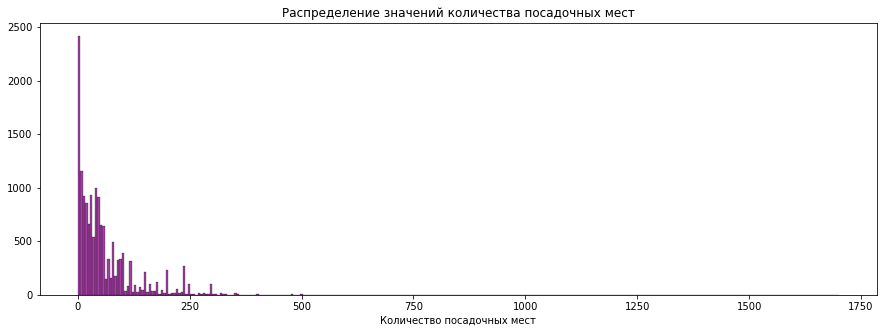

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(rest['number'], color= 'purple')
plt.title('Распределение значений количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('');

In [14]:
rest['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Минимально значение  - 0, максимальное - 1700. В первом случае - это могут быть заведения с блюдами на вынос. Помещение на 1700 мест похоже на огромный концертный зал. 

In [15]:
rest.query('number == 1700')

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700


Наша догадка подтвердилась. Это единственое такое крупное место, посадка в разы превышает медианное значение равное 40 местам. Удалять пока не будем (хотя оно и сильно влияет на среднее и создает жирный хвост на гистограмме), т.к. это реальное место и данные достоверные

### Столбец address

Выделим название улицы в отдельный столбец `street`. Для это создадим список слов с наименованиями элементов городской инфраструктуры и с помощью регулярных выражений вытащим из столбца `address` подстроки, включающие элемент из списка и его название. 

In [16]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'аллея','бульвар','набережная','тупик','линия']

reg_exp = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

rest["street"] = rest["address"].str.extract(reg_exp, flags=re.I)

Посмотрим, что получилось

In [17]:
rest.head(15)

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240,Абрамцевская улица
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90,Авиамоторная улица
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150,Авиамоторная улица
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120,Авиамоторная улица


Посмотрим, есть ли значения , которые не были обработаны.

In [18]:
rest[rest['street'].isna()]

,id,object_name,chain,object_type,address,number,street
394,150654,Love,нет,кафе,"город Москва, 2-й квартал Капотня, дом 1",40,NaN
859,23601,Буфет - ГБОУ СОШ № 64,нет,буфет,"Партизанская улица, дом 30",100,NaN
860,23604,Буфет - ГБОУ 60,нет,буфет,"Партизанская улица, дом 30",100,NaN
1405,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,NaN
1406,68113,Френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,NaN
...,...,...,...,...,...,...,...
14997,216942,Шашлычный дворик,нет,кафе,"город Москва, поселение Десеновское, деревня Ватутинки, владение 10",15,NaN
14998,216926,Кафе «Сахли»,нет,закусочная,"город Москва, поселение Десеновское, деревня Ватутинки, владение 15",10,NaN
15015,208239,ГАЗПРОМНЕФТЬ,нет,кафе,"поселение ""Мосрентген"", деревня Дудкино, владение 1",20,NaN
15184,220587,Пицца Паоло,да,кафетерий,"город Москва, город Зеленоград, корпус 1627",0,NaN


Видим, что строки, где появились NaN в стобце в улицей, это города, деревни и поселения у которых в адресе улица не указана в принципе. Также где-то не указан город. Вероятно, это всё же Москва, но 100% уверенности нет.

Если мы заменим все NaN на какое-либо значение (например, "нет информации"), то при дальнейшей группировке по названию улиц таких значений будет достаточно много. Т.к. для дальнейших расчетов данные строки нам не понадобятся, думаю, их следует удалить.

In [19]:
rest['street'] = rest['street'].dropna()

### Вывод

В полученных данных:
1. отсутствуют пропуски
2. отсутствуют явные дубликаты
3. отсутствуют нарушения стиля
4. добавлен столбец с улицами
5. удалены строки без улиц либо без города

Можем работать с данными

In [20]:
rest[rest.loc[:, rest.columns != 'id'].duplicated()]

,id,object_name,chain,object_type,address,number,street
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100,2-я Бауманская улица
3481,20914,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40,Ленинградский проспект
4431,23759,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100,Беловежская улица
4537,23391,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15,Новозаводская улица
5059,20021,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, корпус 1",20,Багратионовский проезд
...,...,...,...,...,...,...,...
14578,222932,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120,Кировоградская улица
14596,204947,Буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0,Ореховый бульвар
14844,219518,Sushi-Make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0,Ярцевская улица
15173,218542,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корпус 1",0,Алтуфьевское шоссе


In [21]:
rest.query('object_name == "Буфет Мади"')

,id,object_name,chain,object_type,address,number,street
3480,20913,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40,Ленинградский проспект
3481,20914,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40,Ленинградский проспект


In [22]:
rest.query('object_name == "Старый Баку"')

,id,object_name,chain,object_type,address,number,street
9750,169761,Старый Баку,нет,ресторан,"город Москва, Грайвороновская улица, дом 12, корпус 1",92,Грайвороновская улица
14577,222885,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120,Кировоградская улица
14578,222932,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120,Кировоградская улица


In [23]:
rest.columns

Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number',
       'street'],
      dtype='object')

Действительно, если не включать в выборку столбец `id`, то в таблице обнаруживаются дубликаты. Удалим их

In [24]:
rest = rest.drop_duplicates(subset= ['object_name', 'chain', 'object_type', 'address', 'number','street'])

## Анализ данных

### Соотношение видов объектов общественного питания по количеству

Посмотрим количество заведений каждого типа и для наглядности построим диаграмму

In [25]:
type_number = rest['object_type'].value_counts().reset_index()
type_number.columns = ['object', 'count']

In [26]:
type_number

,object,count
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1898
4,бар,855
5,буфет,577
6,кафетерий,395
7,закусочная,349
8,магазин (отдел кулинарии),273


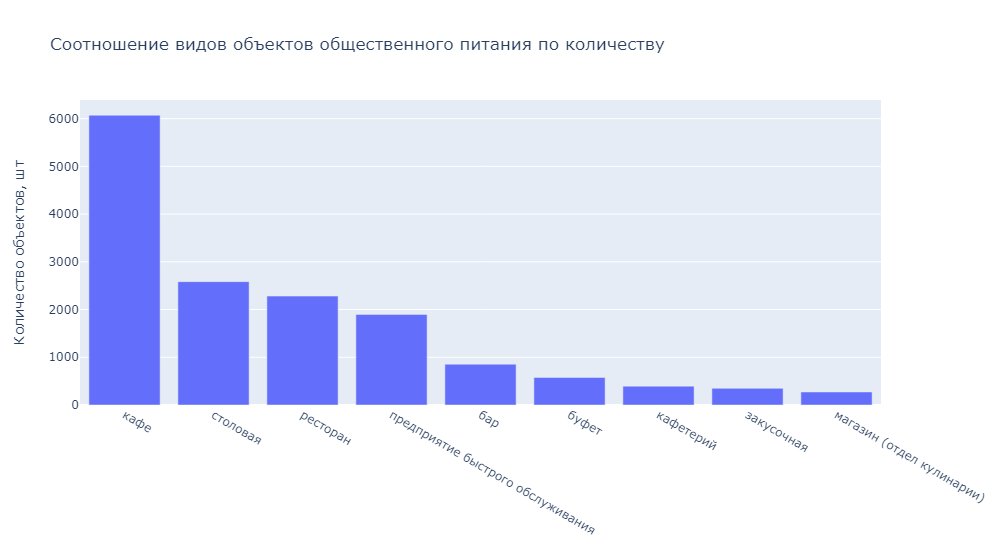

In [27]:
fig = px.bar(
    type_number, 
    x='object', 
    y='count', 
    title='Соотношение видов объектов общественного питания по количеству')
fig.update_layout(
    autosize=False,
    width=1000,
    height=550, 
    yaxis_title='Количество объектов, шт', 
    xaxis_title=None)
fig.show() 

#### Выводы

Видим, что больше всего в городе представлено заведений с типом "кафе" - 6 тысяч. заведений.

Далее идут столовые, рестораны и предприятия быстрого обслуживания. У них примерно одинаковые количества.

Остальные заведения менее распространены

### Для какого вида объекта общественного питания характерно сетевое распространение?

Рассмотрим, какая доля сетевых и несетевых заведений представлена в городе. 

In [28]:
chain = rest['chain'].value_counts().reset_index()
chain.columns = ['type', 'count']

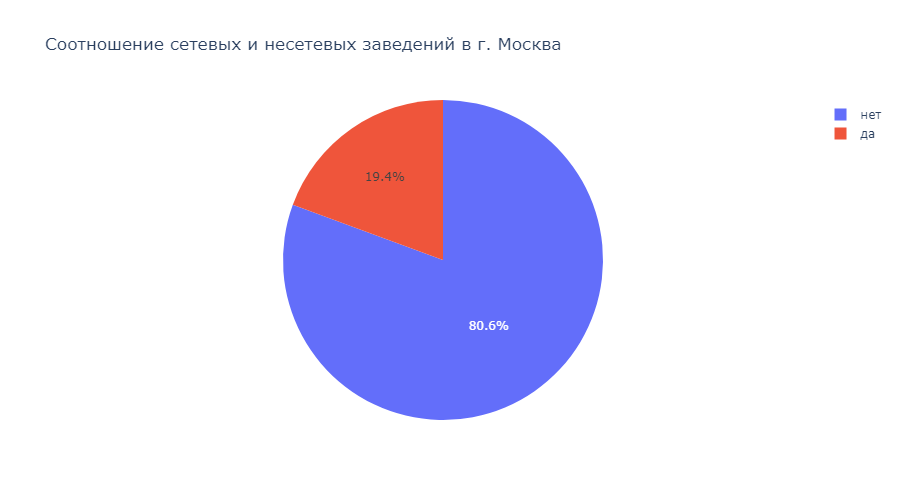

In [29]:
fig = go.Figure(
    data=[go.Pie(labels=chain['type'], values=chain['count'])],
    layout_title_text="Соотношение сетевых и несетевых заведений в г. Москва")
fig.update_layout(width=900,height=500)
fig.show()

Только 20% заведений в городе сетевые. Посмотрим теперь, какие заведения преобладают в каждой группе

In [30]:
type_number_chain = rest.query('chain == "да"')['object_type'].value_counts().reset_index()
type_number_chain.columns = ['object', 'count']

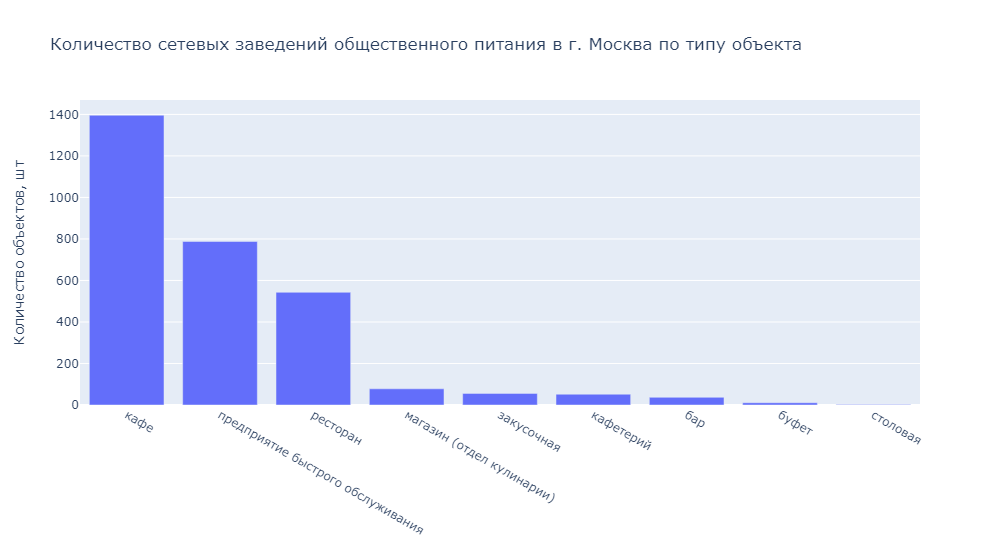

In [31]:
fig = px.bar(type_number_chain, 
            x='object', 
            y='count', 
            title='Количество сетевых заведений общественного питания в г. Москва по типу объекта')
fig.update_layout(autosize=False,width=1000,height=550, yaxis_title='Количество объектов, шт', xaxis_title=None)
fig.show() 

В сетевых заведениях больше всего кафе, предприятий быстрого обслуживания и ресторанов. Ничего удивительного т.к. KFC, Макдоналдс и Бургер кинг есть практически в любом торговом центре и у любой станции метро. Доля других заведений крайне мала по сравнению с первыми тремя позициям

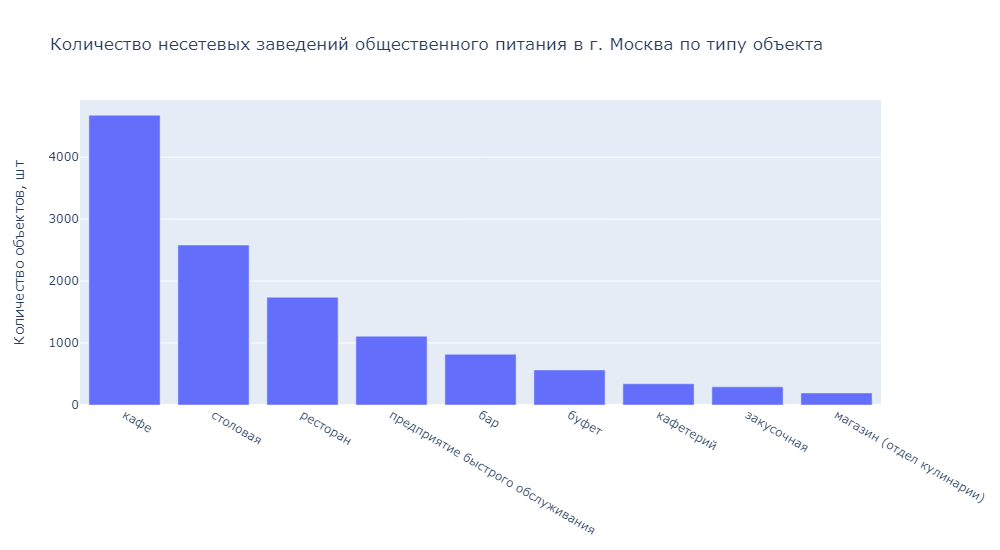

In [32]:
type_number_non_chain = rest.query('chain == "нет"')['object_type'].value_counts().reset_index()
type_number_non_chain.columns = ['object', 'count']

fig = px.bar(type_number_non_chain, 
            x='object', 
            y='count', 
            title='Количество несетевых заведений общественного питания в г. Москва по типу объекта')
fig.update_layout(autosize=False,width=1000,height=550, yaxis_title='Количество объектов, шт', xaxis_title=None)
fig.show() 

Среди несетевых заведений с большим отрывом также преобладют кафе. Единственное отличие в топ-3 категорий - это наличие большого количества столовых. Вероятно, это связано с тем, что на многих предприятиях, заводах или в учебных заведений есть собственная столовая.

#### Выводы
Сетевое распространение характерно для кафе

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Для ответа на этот вопрос для каждого вида заведений определим общее количество заведений и среднее количество посадочных мест

In [33]:
chain_rest_type = (rest.query('chain == "да"').pivot_table(
    index='object_type', 
    values=['number' , 'object_name'], 
    aggfunc={'number' : 'mean', 'object_name' : 'count'}).reset_index()
             )
chain_rest_type.columns = ['type', 'avg_seat', 'count']

In [34]:
chain_rest_type.sort_values('count', ascending=False)

,type,avg_seat,count
3,кафе,47.426934,1396
6,предприятие быстрого обслуживания,40.319797,788
7,ресторан,100.362799,543
5,магазин (отдел кулинарии),8.679487,78
2,закусочная,14.375000,56
4,кафетерий,12.269231,52
0,бар,53.027027,37
1,буфет,12.727273,11
8,столовая,112.333333,3


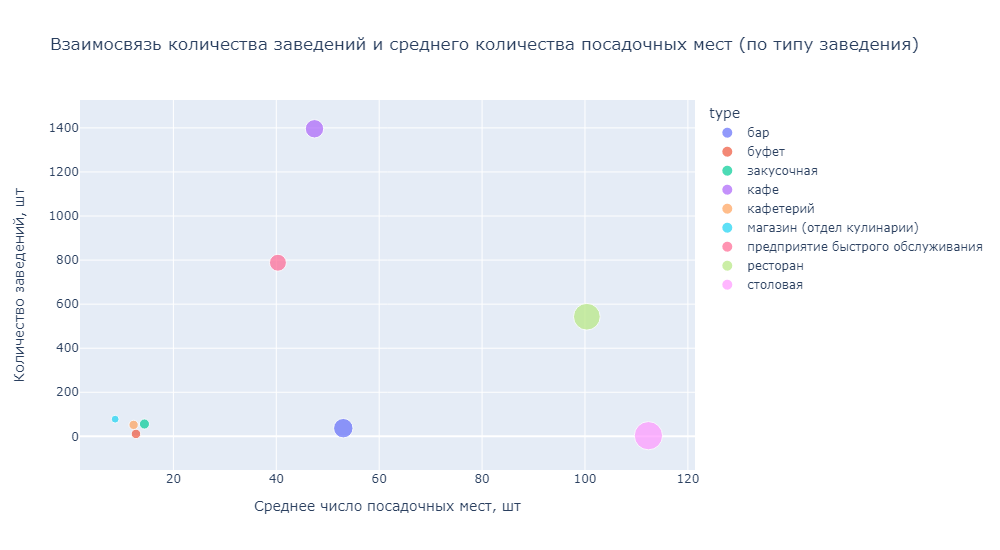

In [35]:
fig = px.scatter(chain_rest_type, 
                 x='avg_seat' , 
                 y='count', 
                 color='type', 
                 size='avg_seat', 
                 title = 'Взаимосвязь количества заведений и среднего количества посадочных мест (по типу заведения)')
fig.update_layout(autosize=False,
                  width=1000,
                  height=550, 
                  yaxis_title='Количество заведений, шт', 
                  xaxis_title='Cреднее число посадочных мест, шт')
fig.show()

Видим, что больше всего заведений с 40-50 посадочными местами. Это кафе и предприятия быстрого обслуживания.
В кафетериях, закусочных , буфетах и кулинариях  мало и посадочных мест, и самих заведений.

Повторим вычисления теперь уже для каждого объекта

In [36]:
chain_rest_name = (rest.query('chain == "да"').pivot_table(
    index='object_name', 
    values=['number', 'object_type'], 
    aggfunc={'number': 'mean','object_type' : ['count','first'] }).reset_index()
             )
chain_rest_name.columns = ['name', 'avg_seat', 'count', 'type']

In [37]:
chain_top_10 = chain_rest_name.sort_values('count',ascending=False).head(10)

In [38]:
chain_top_10

,name,avg_seat,count,type
30,KFC,55.341935,155,ресторан
702,Шоколадница,56.170213,141,кафе
127,Бургер Кинг,45.016393,122,предприятие быстрого обслуживания
418,Макдоналдс,82.173554,121,ресторан
195,Домино'с Пицца,18.209302,86,кафе
653,Теремок,25.047619,84,кафе
384,Крошка Картошка,22.963415,82,предприятие быстрого обслуживания
428,Милти,1.430769,65,магазин (отдел кулинарии)
629,Суши Wok,7.131148,61,предприятие быстрого обслуживания
473,Папа Джонс,22.160000,50,кафе


Получили интересную таблицу с неожиданной класификацией для некоторых из самых крупных сетей. Ранее KFC и Макдоналдс были ошибочно отнесены к предприятиям быстрого обслуживания. На самом деле это рестораны.

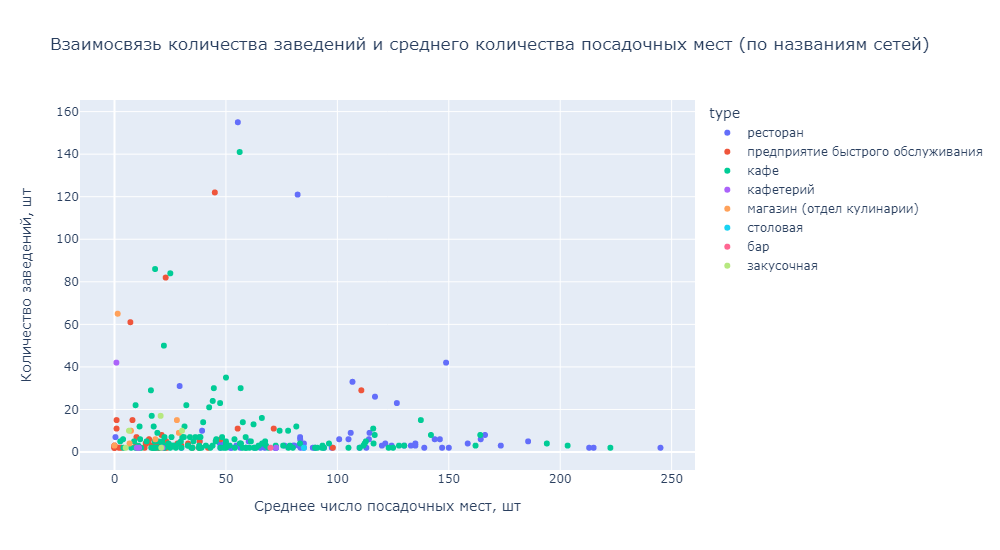

In [39]:
fig = px.scatter(chain_rest_name.query('count > 1'), 
                 x='avg_seat' , 
                 y='count', 
                 color='type',
                 title='Взаимосвязь количества заведений и среднего количества посадочных мест (по названиям сетей)')
fig.update_layout(autosize=False,
                  width=1000,
                  height=550, 
                  yaxis_title='Количество заведений, шт', 
                  xaxis_title='Cреднее число посадочных мест, шт')
fig.show()

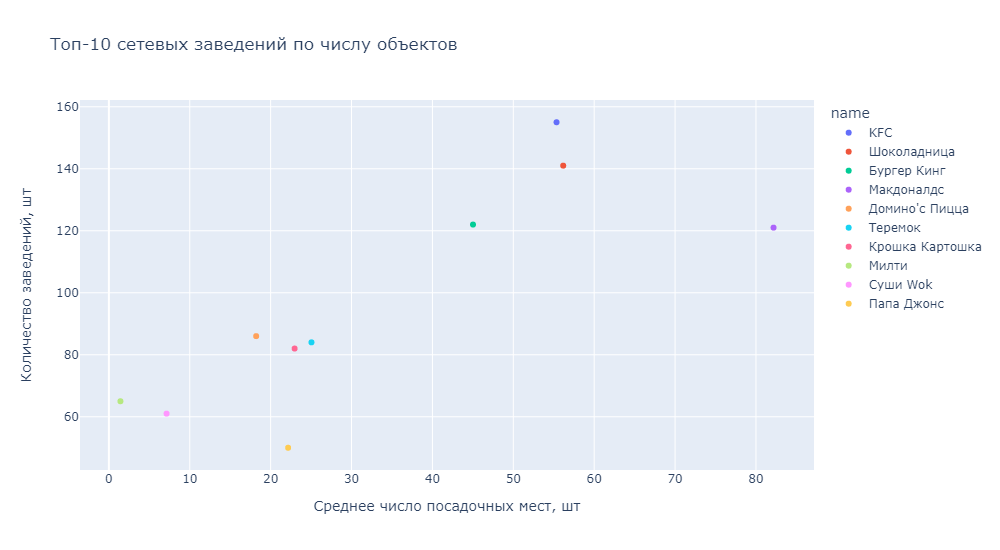

In [40]:
fig = px.scatter(chain_top_10, 
                 x='avg_seat' , 
                 y='count', 
                 color='name',
                 title='Топ-10 сетевых заведений по числу объектов')
fig.update_layout(autosize=False,
                  width=1000,
                  height=550, 
                  yaxis_title='Количество заведений, шт', 
                  xaxis_title='Cреднее число посадочных мест, шт')
fig.show()

Видим, что в нижней части диаграммы скопились сетевые объекты с небольшим количеством заведений и с самым разным числом посадочных мест.

А в верхней части наиболее известные сети с большим количеством заведений и числом посадочных мест до 90 шт.

#### Выводы

На основе полученных данных нельзя однозначно сказать, что более характерно для сетевых заведений. 

1. Основная масса сетей имеет до 20 заведений и до 100 посадочных мест.
2. Крупных объектов с более, чем со 150 посадочными местами немного
3. У самых крупных сетей видим прямопропорциональную зависимость - с ростом числа объектов расте число посадочных мест.

### Какой вид предоставляет в среднем самое большое количество посадочных мест?

Для ответа на этот вопрос построим столбчатую диаграмму

In [41]:
rest_type = (rest.pivot_table(
    index='object_type', 
    values=['number' , 'object_name'], 
    aggfunc={'number' : 'mean', 'object_name' : 'count'}).reset_index())

In [42]:
rest_type.columns = ['type', 'avg_seat', 'name']

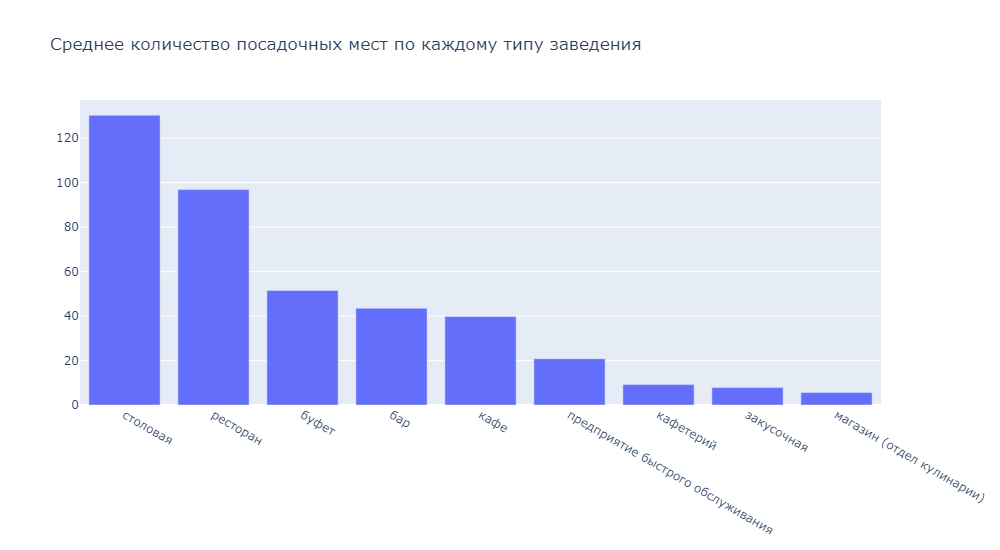

In [43]:
fig = px.bar(rest_type.sort_values('avg_seat', ascending=False), 
            x='type', 
            y='avg_seat', 
            title='Среднее количество посадочных мест по каждому типу заведения')
fig.update_layout(autosize=False,width=1000,height=550, yaxis_title=None, xaxis_title=None)
fig.show() 

Из графика видим, что наибольшее среднее количество посадочных мест в столовых и ресторанах. Никаких сюрпризов. 

Столовые в принципе созданы для обеспечения питанием наибольшего количества людей. У ресторанов цель несколько другая и предусматривает более продолжительный прием пищи, но для них так же характерно большое количество мест.

#### Выводы

Наибольшее количество мест представлено в столовых.

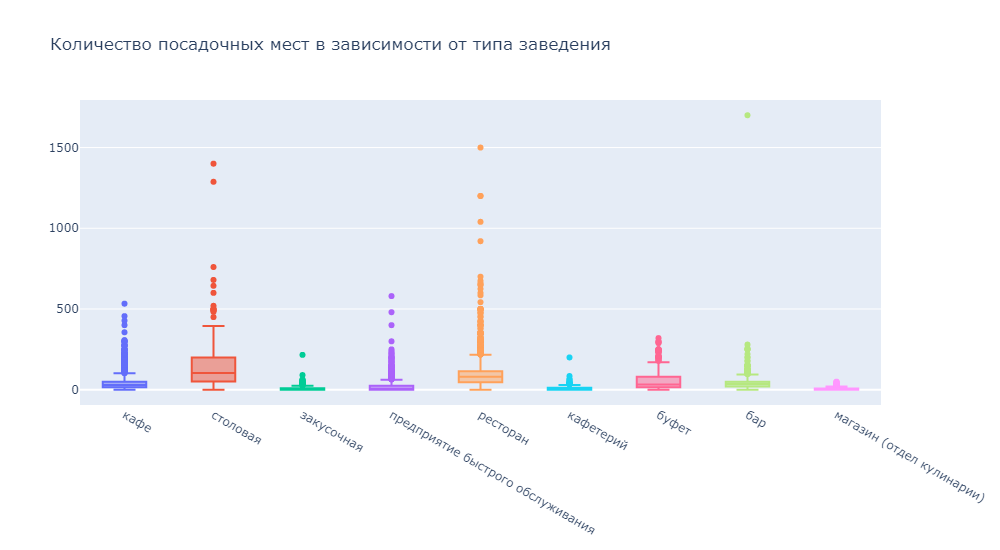

In [44]:
fig = px.box(rest, 
            x='object_type', 
            y='number', 
            title='Количество посадочных мест в зависимости от типа заведения',
            color='object_type')
fig.update_layout(autosize=False,
                  width=1000,
                  height=550, 
                  yaxis_title=None, 
                  xaxis_title=None,
                  showlegend=False)
fig.show() 

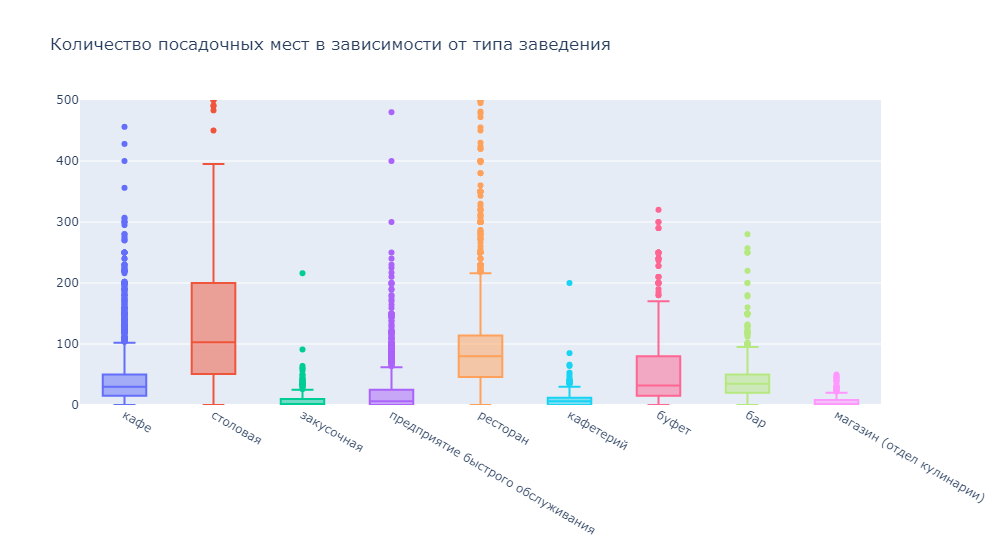

In [45]:
fig = px.box(rest, 
            x='object_type', 
            y='number', 
            title='Количество посадочных мест в зависимости от типа заведения',
            color='object_type')
fig.update_layout(autosize=False,
                  width=1000,
                  height=550, 
                  yaxis_title=None, 
                  xaxis_title=None,
                  yaxis_range=[0, 500],
                  showlegend=False)
fig.show() 

Наибольшее медианное значение также у столовых. Следом идут рестораны.
Видим, что практически у все типов имеются выбросы в разы превышающие медиану. Есть несколько заведений превышающих отметку в 1000 мест

### Топ-10 улиц по количеству объектов общественного питания

Импортируем из открытого источника датасет содержащий названия районов и округов г. Москвы

In [46]:
from io import BytesIO
import requests
spreadsheet_id = '1Da1wJ8sebkvIfCkWGtkhPy7W3FpZ28eGiLlJdvHzutM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))

In [47]:
df.head()

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригородская территория муниципальный округ Таганский, Абельмановская улица, дом 6",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистического Труда Г.В. Кисунько» Школа № 1051,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN


Объединим загруженный датасет `df` с датасетом `rest`. Предварительно приведем названия столбцов к нижнему регистру для единообразия с исходной таблицей и добавим только два столбца с названием района и административного округа.

In [48]:
df.columns = df.columns.str.lower()

In [49]:
rest_data = rest.merge(df[['admarea','district','address']], on='address', how='right')

In [50]:
rest_data.head(10)

,id,object_name,chain,object_type,address,number,street,admarea,district
0,NaN,NaN,NaN,NaN,Адрес,NaN,NaN,Административный округ по адресу,Район
1,151635.0,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48.0,улица Егора Абакумова,Северо-Восточный административный округ,Ярославский район
2,77874.0,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0,улица Талалихина,Центральный административный округ,Таганский район
3,NaN,NaN,NaN,NaN,"Российская Федерация, город Москва, внутригородская территория муниципальный округ Таганский, Абельмановская улица, дом 6",NaN,NaN,Центральный административный округ,Таганский район
4,NaN,NaN,NaN,NaN,"город Москва, Угличская улица, дом 17",NaN,NaN,Северо-Восточный административный округ,район Лианозово
5,148815.0,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10.0,переулок Сивцев Вражек,Центральный административный округ,район Арбат
6,20957.0,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90.0,Авиамоторная улица,Юго-Восточный административный округ,район Лефортово
7,20958.0,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150.0,Авиамоторная улица,Юго-Восточный административный округ,район Лефортово
8,28858.0,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120.0,Авиамоторная улица,Юго-Восточный административный округ,район Лефортово
9,20957.0,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90.0,Авиамоторная улица,Юго-Восточный административный округ,район Лефортово


In [51]:
(rest_data.groupby('street').agg({'admarea': 'first',
                                  'district' : 'first',
                                  'object_name':'nunique'})
                             .sort_values('object_name', ascending=False).reset_index()
                             .head(10))

,street,admarea,district,object_name
0,проспект Мира,Центральный административный округ,Мещанский район,161
1,Пресненская набережная,Центральный административный округ,Пресненский район,132
2,Профсоюзная улица,Юго-Западный административный округ,район Черёмушки,131
3,Ленинградский проспект,Северный административный округ,район Беговой,117
4,Варшавское шоссе,Южный административный округ,Донской район,113
5,Ленинский проспект,Центральный административный округ,район Якиманка,111
6,Ходынский бульвар,Северный административный округ,Хорошёвский район,98
7,Кировоградская улица,Южный административный округ,район Чертаново Южное,96
8,проспект Вернадского,Юго-Западный административный округ,Ломоносовский район,94
9,улица Новый Арбат,Центральный административный округ,район Арбат,87


#### Выводы

4 из 10 улиц с наибольшей плотностью объектов общественного питания находятся в Центральном административном округе, что было ожидаемо. Это проспект Мира, Пресненская набережная, Ленинский проспект и Новый Арбат.

Все 10 улиц находятся в разных районах, что несколько удивительно. Районы Беговой и Южное Чертаново достаточно удалены от центра и их с трудом можно назвать гастрономическими центрами города. Вероятно, такие высокие показатели количества заведений на Ленинградском проспекте и Кировоградской улице связаны с протяженнностью данных улиц. Они проходят сквозь весь район и продолжаются в других районах.

### Улицы с одним заведением общественного питания

Отфильтруем улицы с 1 заведением общественного питания

In [52]:
just_one = (rest_data.groupby('street')
                     .agg({'admarea': 'first',
                           'district' : 'first',
                           'object_name':'nunique'})
                     .query('object_name == 1').reset_index()
                             )

In [53]:
just_one.head()

,street,admarea,district,object_name
0,1-й Балтийский переулок,Северный административный округ,район Аэропорт,1
1,1-й Басманный переулок,Центральный административный округ,Красносельский район,1
2,1-й Ботанический проезд,Северо-Восточный административный округ,район Свиблово,1
3,1-й Варшавский проезд,Южный административный округ,район Москворечье-Сабурово,1
4,1-й Голутвинский переулок,Центральный административный округ,район Якиманка,1


Сгруппируем полученную выборку по районам и посмотрим, в каких больше всего "улиц-одиночек". Выделим 10 районов

In [54]:
just_one.groupby('district')['object_name'].sum().reset_index().sort_values('object_name', ascending=False).head(10)

,district,object_name
4,Басманный район,26
24,Таганский район,24
106,район Хамовники,24
25,Тверской район,17
21,Пресненский район,17
16,Можайский район,12
15,Мещанский район,11
99,район Сокольники,11
40,район Аэропорт,10
12,Красносельский район,10


#### Выводы

Какую-то связь выявить сложно. Примерно половина районов находится в центре города, всё это дорогие районы. Только Можайский район, Аэропорт и Сокольники можно отнести к спальным районам, где не должно быть большого количества объектов общественного питания.

Возможно, по аналогии с выводами в п.2.5., дело в том, что в центральных районах много небольших, коротких улочек и на них действительно может быть только одно кафе или ресторан.

## Общие выводы

Была поставлена задача дать рекомендации о виде заведения, количестве посадочных мест  и районе.
У нас есть данные только о количестве мест, заведений и их адреса, и никаких сведений о рейтингах заведений и их экономических показателях.

Если исходить из того, что мы опираемся на самые популярные и распространенные заведения и не боимся конкуренции (которая будет очень жесткой, т.к. ,как минимум, конкурентов будет предостаточно, а в Москве ежегодно открываются и закрываются сотни заведений), то рекомендации следуюшие:
1. Тип заведения - кафе
2. Количество посадочных мест - 40-60
3. Район - Мещанский. Высокая проходимость обеспечена. Впрочем как и самые дорогие арендные ставки.